In [4]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_csv('AB_NYC_2019.csv')
data.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


Qual a média de preço por região?

In [10]:
colunas = ['price','neighbourhood_group']
coluna_groupby = ['neighbourhood_group']

data.loc[:,colunas].groupby(coluna_groupby).mean().reset_index()

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


Qual o maior valor do aluguel por bairro e por tipo de quarto?

In [12]:
colunas = ['price','neighbourhood','room_type']
coluna_groupby = ['neighbourhood','room_type']

data.loc[:,colunas].groupby(coluna_groupby).max().reset_index()

,neighbourhood,room_type,price
0,Allerton,Entire home/apt,450
1,Allerton,Private room,142
2,Arden Heights,Entire home/apt,83
3,Arden Heights,Private room,41
4,Arrochar,Entire home/apt,625
...,...,...,...
535,Woodlawn,Shared room,70
536,Woodrow,Entire home/apt,700
537,Woodside,Entire home/apt,500
538,Woodside,Private room,475


Qual o menor valor de latitude por região?

In [13]:
colunas = ['latitude','neighbourhood_group']
coluna_groupby = ['neighbourhood_group']

data.loc[:,colunas].groupby(coluna_groupby).min().reset_index()

,neighbourhood_group,latitude
0,Bronx,40.80011
1,Brooklyn,40.57115
2,Manhattan,40.70234
3,Queens,40.56546
4,Staten Island,40.49979


Faça um histograma somente com os proprietários que possuem mais de
um imóvel listado na base de dados de NY.

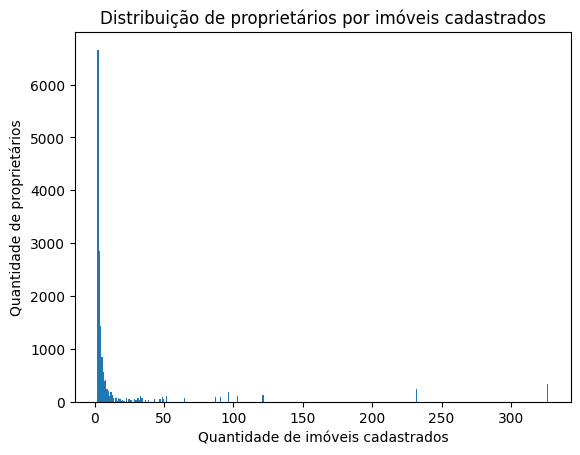

In [24]:
data.head(1)

colunas = ['host_id','calculated_host_listings_count']

linhas = data.loc[:,'calculated_host_listings_count']>1

data_plot = data.loc[linhas,'calculated_host_listings_count']

plt.hist(data_plot, bins=350);
plt.title('Distribuição de proprietários por imóveis cadastrados');
plt.xlabel('Quantidade de imóveis cadastrados');
plt.ylabel('Quantidade de proprietários');

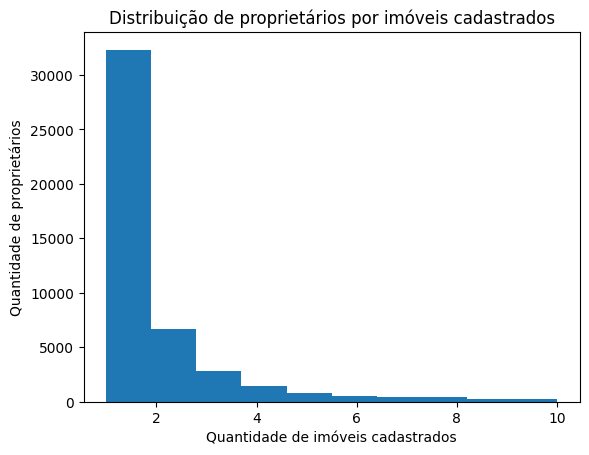

In [27]:
colunas = ['host_id','calculated_host_listings_count']

linhas = data.loc[:,'calculated_host_listings_count'] <= 10

data_plot = data.loc[linhas,'calculated_host_listings_count']

plt.hist(data_plot, bins=10);
plt.title('Distribuição de proprietários por imóveis cadastrados');
plt.xlabel('Quantidade de imóveis cadastrados');
plt.ylabel('Quantidade de proprietários');

Desenhe um mapa com os imóveis mais baratos por região.

In [31]:
#encontrar imóveis mais baratos por regiao
colunas = ['price','neighbourhood_group', 'latitude','longitude']
coluna_groupby = ['neighbourhood_group']

data_plot = data.loc[:,colunas].groupby(coluna_groupby).min().reset_index()
data_plot

#desenhar mapa
map = folium.Map()

for index,location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],location_info['longitude']],
                popup=location_info[['neighbourhood_group','price']]
                ).add_to(map)

map

Desenhe um mapa com os imóveis que possuem o maior número de
avaliações por região.

In [40]:
#determinar imóveis com maior número de avaliações
data.head(1)

colunas = ['number_of_reviews','neighbourhood_group','latitude','longitude']
colunas_groupby = 'neighbourhood_group'
data_plot = data.loc[:,colunas].groupby(colunas_groupby).max().reset_index()

#desenhar mapa
map = folium.Map()

for index,location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],location_info['longitude']],
                popup=location_info['neighbourhood_group']
  ).add_to(map)

map

Desenhe um mapa somente com 100 imóveis do tipo “private room”
escolhidos aleatoriamente

In [42]:
#sortear 100 imóveis aleatoriamente
colunas = ['room_type','latitude','longitude']
linhas = data.loc[:,'room_type'] == 'Private room'

data_plot = data.loc[linhas,colunas].sample(100)

#desenhar mapa
map = folium.Map()

for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],location_info['longitude']],
                  popup=location_info['room_type']
                ).add_to(map)

map

Desenhe um mapa somente com 100 imóveis do tipo “shared room”
escolhidos aleatoriamente

In [44]:
#sortear 100 imóveis aleatoriamente
colunas = ['room_type','latitude','longitude']
linhas = data.loc[:,'room_type'] == 'Shared room'

data_plot = data.loc[linhas,colunas].sample(100)

#desenhar mapa
map = folium.Map()

for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],location_info['longitude']],
                  popup=location_info['room_type']
                ).add_to(map)

map